## Импорты

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn.objects as so


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Загрузка данных

In [ ]:
path_df = '/content/drive/MyDrive/Colab Notebooks/Hahaton_Media/train/train.xlsx'
df_namecol = pd.read_excel(path_df).iloc[4]

df = pd.read_excel(path_df, names=df_namecol)[5:]
df.head(5)

,год,неделя,Начало нед,"Продажи, рубли","Продажи, упаковки","Продажи, рубли.1","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки",...,Итого.11,"ТВ, trp\n(Ж 30-60 ВС).12","ТВ, охват 5+\n(Ж 30-60 ВС).12","ТВ, рубли.12","Диджитал, руб.12","ТВ спонсорство, рубли.12","OOH, рубли.12","Радио, рубли.13",Итого.12,NaN
5,2019,1,2018-12-31 00:00:00,41535567.339,114621.15,0,0,0,0,0,...,11834254.13,207.903106,15.3615,9085528.010323,0,0,0,0,9085528.01,NaN
6,NaN,2,2019-01-07 00:00:00,51222286.227,141523.2,0,0,0,0,0,...,13996532.16,317.467542,25.5255,10599782.67871,0,0,0,0,10599782.68,NaN
7,NaN,3,2019-01-14 00:00:00,57127348.908,157926.3,0,0,0,0,0,...,11466294.66,192.816682,13.9125,10599782.67871,0,0,0,0,10599782.68,NaN
8,NaN,4,2019-01-21 00:00:00,63040990.9395,173746.65,0,0,0,0,0,...,10764632.16,138.371621,8.0535,10599782.67871,0,0,0,0,10599782.68,NaN
9,NaN,5,2019-01-28 00:00:00,67336888.8675,185551.8,0,0,0,0,0,...,10984967.91,286.984113,24.2235,12893092.405548,0,0,0,0,12893092.41,NaN


## Работа с данными

### Выделение столбца с KPI

In [ ]:
KPI_df = df[df_namecol[4:12]][53:244].reset_index(drop=True)
KPI_df.head(5)

,"Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки","раствор 0.01 % 500 мл N1, упаковки"
0,155940.75,57384154.338,0,0,0,0,0,0
1,167085.45,61161744.504,0,0,0,0,0,0
2,187254.9,68402146.9215,0,0,0,0,0,0
3,214536,78930010.719,357119029.9005,131122625.4135,19644473.037,886424.7,461401.5,25565.4
4,222696.6,81963276.4965,0,0,0,0,0,0


### Срез df с KPI, ежемесячные значения

In [ ]:
KPI_df_value = KPI_df[KPI_df['раствор 0.01 % 150 мл N1, руб']!=0].reset_index(drop=True)
KPI_df_value.head(5)

,"Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки","раствор 0.01 % 500 мл N1, упаковки"
0,214536,78930010.719,357119029.9005,131122625.4135,19644473.037,886424.7,461401.5,25565.4
1,190207.5,71263465.3815,398455017.555,143904116.5275,23000789.427,979659.45,504816.9,29911.35
2,325400.25,138975870.81,792793966.671,289490292.7875,69291877.179,1824810.75,974304.45,82013.4
3,106506.75,48865520.7075,405888761.355,130415930.4945,25021528.9485,799905.75,393209.25,27096.3
4,91381.5,39530685.159,237549417.21,81691096.9455,19236182.049,478070.25,253401.75,20732.25


### Переписывание в срезе Итого за месяц продаж в упаковках

In [ ]:
KPI_df_value['Продажи, упаковки'] = KPI_df_value['раствор 0.01 % 150 мл N1, упаковки'] + KPI_df_value['раствор  0.01 % 50 мл N1, упаковки'] + KPI_df_value['раствор 0.01 % 500 мл N1, упаковки']
KPI_df_value.head(5)

,"Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки","раствор 0.01 % 500 мл N1, упаковки"
0,1373391.6,78930010.719,357119029.9005,131122625.4135,19644473.037,886424.7,461401.5,25565.4
1,1514387.7,71263465.3815,398455017.555,143904116.5275,23000789.427,979659.45,504816.9,29911.35
2,2881128.6,138975870.81,792793966.671,289490292.7875,69291877.179,1824810.75,974304.45,82013.4
3,1220211.3,48865520.7075,405888761.355,130415930.4945,25021528.9485,799905.75,393209.25,27096.3
4,752204.25,39530685.159,237549417.21,81691096.9455,19236182.049,478070.25,253401.75,20732.25


### Выделение % для каждого месяца

In [ ]:
KPI_df_value.columns[5:]

Index(['раствор 0.01 % 150 мл N1, упаковки',
       'раствор  0.01 % 50 мл N1, упаковки',
       'раствор 0.01 % 500 мл N1, упаковки'],
      dtype='object')

In [ ]:
KPI_df_value_Pack = [(np.round(KPI_df_value['раствор 0.01 % 150 мл N1, упаковки'][i]/KPI_df_value['Продажи, упаковки'][i], 5),
                      np.round(KPI_df_value['раствор  0.01 % 50 мл N1, упаковки'][i]/KPI_df_value['Продажи, упаковки'][i], 5),
                      np.round(KPI_df_value['раствор 0.01 % 500 мл N1, упаковки'][i]/KPI_df_value['Продажи, упаковки'][i], 5)
                      ) for i in range(KPI_df_value['Продажи, упаковки'].size)]
KPI_df_value_Pack = pd.DataFrame(KPI_df_value_Pack, columns=['150 мл', '50 мл', '500 мл'])
KPI_df_value_Pack.head(5)

,150 мл,50 мл,500 мл
0,0.64543,0.33596,0.01861
1,0.64690,0.33335,0.01975
2,0.63337,0.33817,0.02847
3,0.65555,0.32225,0.02221
4,0.63556,0.33688,0.02756


### График распределения % продаж


<Axes: >

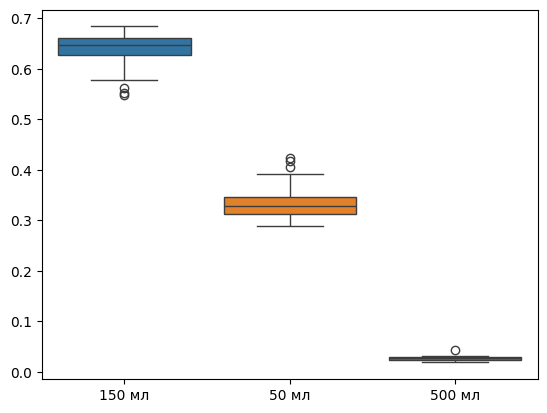

In [ ]:
sns.boxplot(data=KPI_df_value_Pack)

In [ ]:
KPI_precent = np.mean(KPI_df_value_Pack['150 мл']), np.mean(KPI_df_value_Pack['50 мл']), np.mean(KPI_df_value_Pack['500 мл'])
KPI_precent

(0.6391056818181818, 0.33442022727272724, 0.026474318181818182)

### Попытка набросать алгоритм заполнения нулей

In [ ]:
df[df_namecol[4:12]][53:244].columns

Index(['Продажи, упаковки', 'Продажи, рубли', 'раствор 0.01 % 150 мл N1, руб',
       'раствор  0.01 % 50 мл N1, руб', 'раствор 0.01 % 500 мл N1, руб',
       'раствор 0.01 % 150 мл N1, упаковки',
       'раствор  0.01 % 50 мл N1, упаковки',
       'раствор 0.01 % 500 мл N1, упаковки'],
      dtype='object')

In [ ]:
df[df_namecol[4:12]][53:244]['Продажи, упаковки']*df[df_namecol[4:12]][53:244]['раствор 0.01 % 150 мл N1, руб']

58                       0.0
59                       0.0
60                       0.0
61     76614888198733.671875
62                       0.0
               ...          
244    26827417374371.953125
245                      0.0
246                      0.0
247                        0
248    32136460226320.277344
Length: 191, dtype: object

In [ ]:
df[df_namecol[4:12]][53:244]['раствор 0.01 % 150 мл N1, руб'].iloc[0]

0

In [ ]:
df[df_namecol[4:12]][53:244]

,"Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки","раствор 0.01 % 500 мл N1, упаковки"
58,155940.75,57384154.338,0,0,0,0,0,0
59,167085.45,61161744.504,0,0,0,0,0,0
60,187254.9,68402146.9215,0,0,0,0,0,0
61,214536,78930010.719,357119029.9005,131122625.4135,19644473.037,886424.7,461401.5,25565.4
62,222696.6,81963276.4965,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
244,110088.3,56931505.0605,243689995.8885,122713435.509,29294571.054,412081.95,318306.45,22667.4
245,115345.65,59881512.894,0,0,0,0,0,0
246,117761.7,61112178.456,0,0,0,0,0,0
247,118356,61594925.028,0,0,0,0,0,0


In [ ]:
df_copy = df.copy()
weeks=0
months=0
for i in range(df[df_namecol[4:12]][53:244]['Продажи, упаковки'].size):
    if df[df_namecol[4:12]][53:244]['раствор 0.01 % 150 мл N1, руб'].iloc[i]==0:
      weeks+=1
    else:
      weeks+=1
      for k in range(1, weeks+1):
        #packages
        df_copy['раствор 0.01 % 150 мл N1, упаковки'][53:244].iloc[i-k] = np.round(df[df_namecol[4:12]][53:244]['Продажи, упаковки'].iloc[i-k]*KPI_df_value_Pack['150 мл'].iloc[months], 1)
        df_copy['раствор  0.01 % 50 мл N1, упаковки'][53:244].iloc[i-k] = np.round(df[df_namecol[4:12]][53:244]['Продажи, упаковки'].iloc[i-k]*KPI_df_value_Pack['50 мл'].iloc[months], 1)
        df_copy['раствор 0.01 % 500 мл N1, упаковки'][53:244].iloc[i-k] = np.round(df[df_namecol[4:12]][53:244]['Продажи, упаковки'].iloc[i-k]*KPI_df_value_Pack['500 мл'].iloc[months], 1)

        #counts
        df_copy['раствор 0.01 % 150 мл N1, руб'][53:244].iloc[i-k] = np.round(df[df_namecol[4:12]][53:244]['Продажи, рубли'].iloc[i-k]*KPI_df_value_Pack['150 мл'].iloc[months], 4)
        df_copy['раствор  0.01 % 50 мл N1, руб'][53:244].iloc[i-k] = np.round(df[df_namecol[4:12]][53:244]['Продажи, рубли'].iloc[i-k]*KPI_df_value_Pack['50 мл'].iloc[months], 4)
        df_copy['раствор 0.01 % 500 мл N1, руб'][53:244].iloc[i-k] = np.round(df[df_namecol[4:12]][53:244]['Продажи, рубли'].iloc[i-k]*KPI_df_value_Pack['500 мл'].iloc[months], 4)

        #total counts
        df_copy['Продажи, рубли.1'][53:244].iloc[i-k] = np.round(
            df_copy['раствор 0.01 % 150 мл N1, руб'][53:244].iloc[i-k] + df_copy['раствор  0.01 % 50 мл N1, руб'][53:244].iloc[i-k] + df_copy['раствор 0.01 % 500 мл N1, руб'][53:244].iloc[i-k], 4)

      months+=1
      weeks=0
df_copy[df_namecol[4:12]][53:244]

,"Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки","раствор 0.01 % 500 мл N1, упаковки"
58,155940.75,57384154.338,37037454.7344,19278780.4914,1067919.1122,100648.8,52389.9,2902.1
59,167085.45,61161744.504,39475624.7552,20547899.6836,1138220.0652,107842.0,56134.0,3109.5
60,187254.9,68402146.9215,44148797.6875,22980385.2797,1272963.9542,120859.9,62910.2,3484.8
61,214536,78930010.719,51059823.9341,26311319.0732,1558867.7117,138783.3,71515.6,4237.1
62,222696.6,81963276.4965,53022043.5656,27322458.2201,1618774.7108,144062.4,74235.9,4398.3
...,...,...,...,...,...,...,...,...
244,110088.3,56931505.0605,31405695.4516,23760363.637,1765445.9719,60729.1,45945.4,3413.8
245,115345.65,59881512.894,33033037.7728,24991549.4063,1856925.7148,63629.3,48139.5,3576.9
246,117761.7,61112178.456,33711922.1235,25505167.6786,1895088.6539,64962.1,49147.8,3651.8
247,118356,61594925.028,33978224.4424,25706641.9604,1910058.6251,65289.9,49395.9,3670.2


In [ ]:
df_copy.to_excel('data_fill_KPI.xlsx')

In [ ]:
df[df_namecol[4:12]][53:244]['Продажи, упаковки'].size

191

In [ ]:
df[df_namecol[4:12]][53:244]

,"Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки","раствор 0.01 % 500 мл N1, упаковки"
58,155940.75,57384154.338,0,0,0,0,0,0
59,167085.45,61161744.504,0,0,0,0,0,0
60,187254.9,68402146.9215,0,0,0,0,0,0
61,214536,78930010.719,357119029.9005,131122625.4135,19644473.037,886424.7,461401.5,25565.4
62,222696.6,81963276.4965,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
244,110088.3,56931505.0605,243689995.8885,122713435.509,29294571.054,412081.95,318306.45,22667.4
245,115345.65,59881512.894,0,0,0,0,0,0
246,117761.7,61112178.456,0,0,0,0,0,0
247,118356,61594925.028,0,0,0,0,0,0


In [ ]:
KPI_df_value['Продажи, упаковки'].size

44

In [ ]:
KPI_df_value.tail(5)

,"Продажи, упаковки","Продажи, рубли","раствор 0.01 % 150 мл N1, руб","раствор 0.01 % 50 мл N1, руб","раствор 0.01 % 500 мл N1, руб","раствор 0.01 % 150 мл N1, упаковки","раствор 0.01 % 50 мл N1, упаковки","раствор 0.01 % 500 мл N1, упаковки"
39,115224.9,59813586.3465,269663533.5555,110624436.72,29775222.3195,460764.15,292950,22934.1
40,108040.8,56133393.645,253097889.5025,110182344.5415,29243244.5865,432327,292524.75,22624.35
41,103658.1,53426190.4365,240489278.8725,113119150.116,29338537.5045,409013.85,295667.4,22623.3
42,110088.3,56931505.0605,243689995.8885,122713435.509,29294571.054,412081.95,318306.45,22667.4
43,120437.1,63106681.953,266831900.0235,132395112.528,32654557.0995,450227.4,340625.25,25309.2
